<a href="https://colab.research.google.com/github/ArnoldHarun/Face-Emotion-Detection-Machine-Learning/blob/main/FinalFaceEmotonGroup11Day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRANSPARENT MACHINE VISION TECHNIQUES FOR FACIAL EMOTION DETECTION

GROUP 11 DAY


In [ ]:
#CODE STARTS HERE

EXPLORATORY DATA ANALYSIS


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Number of classes: 8


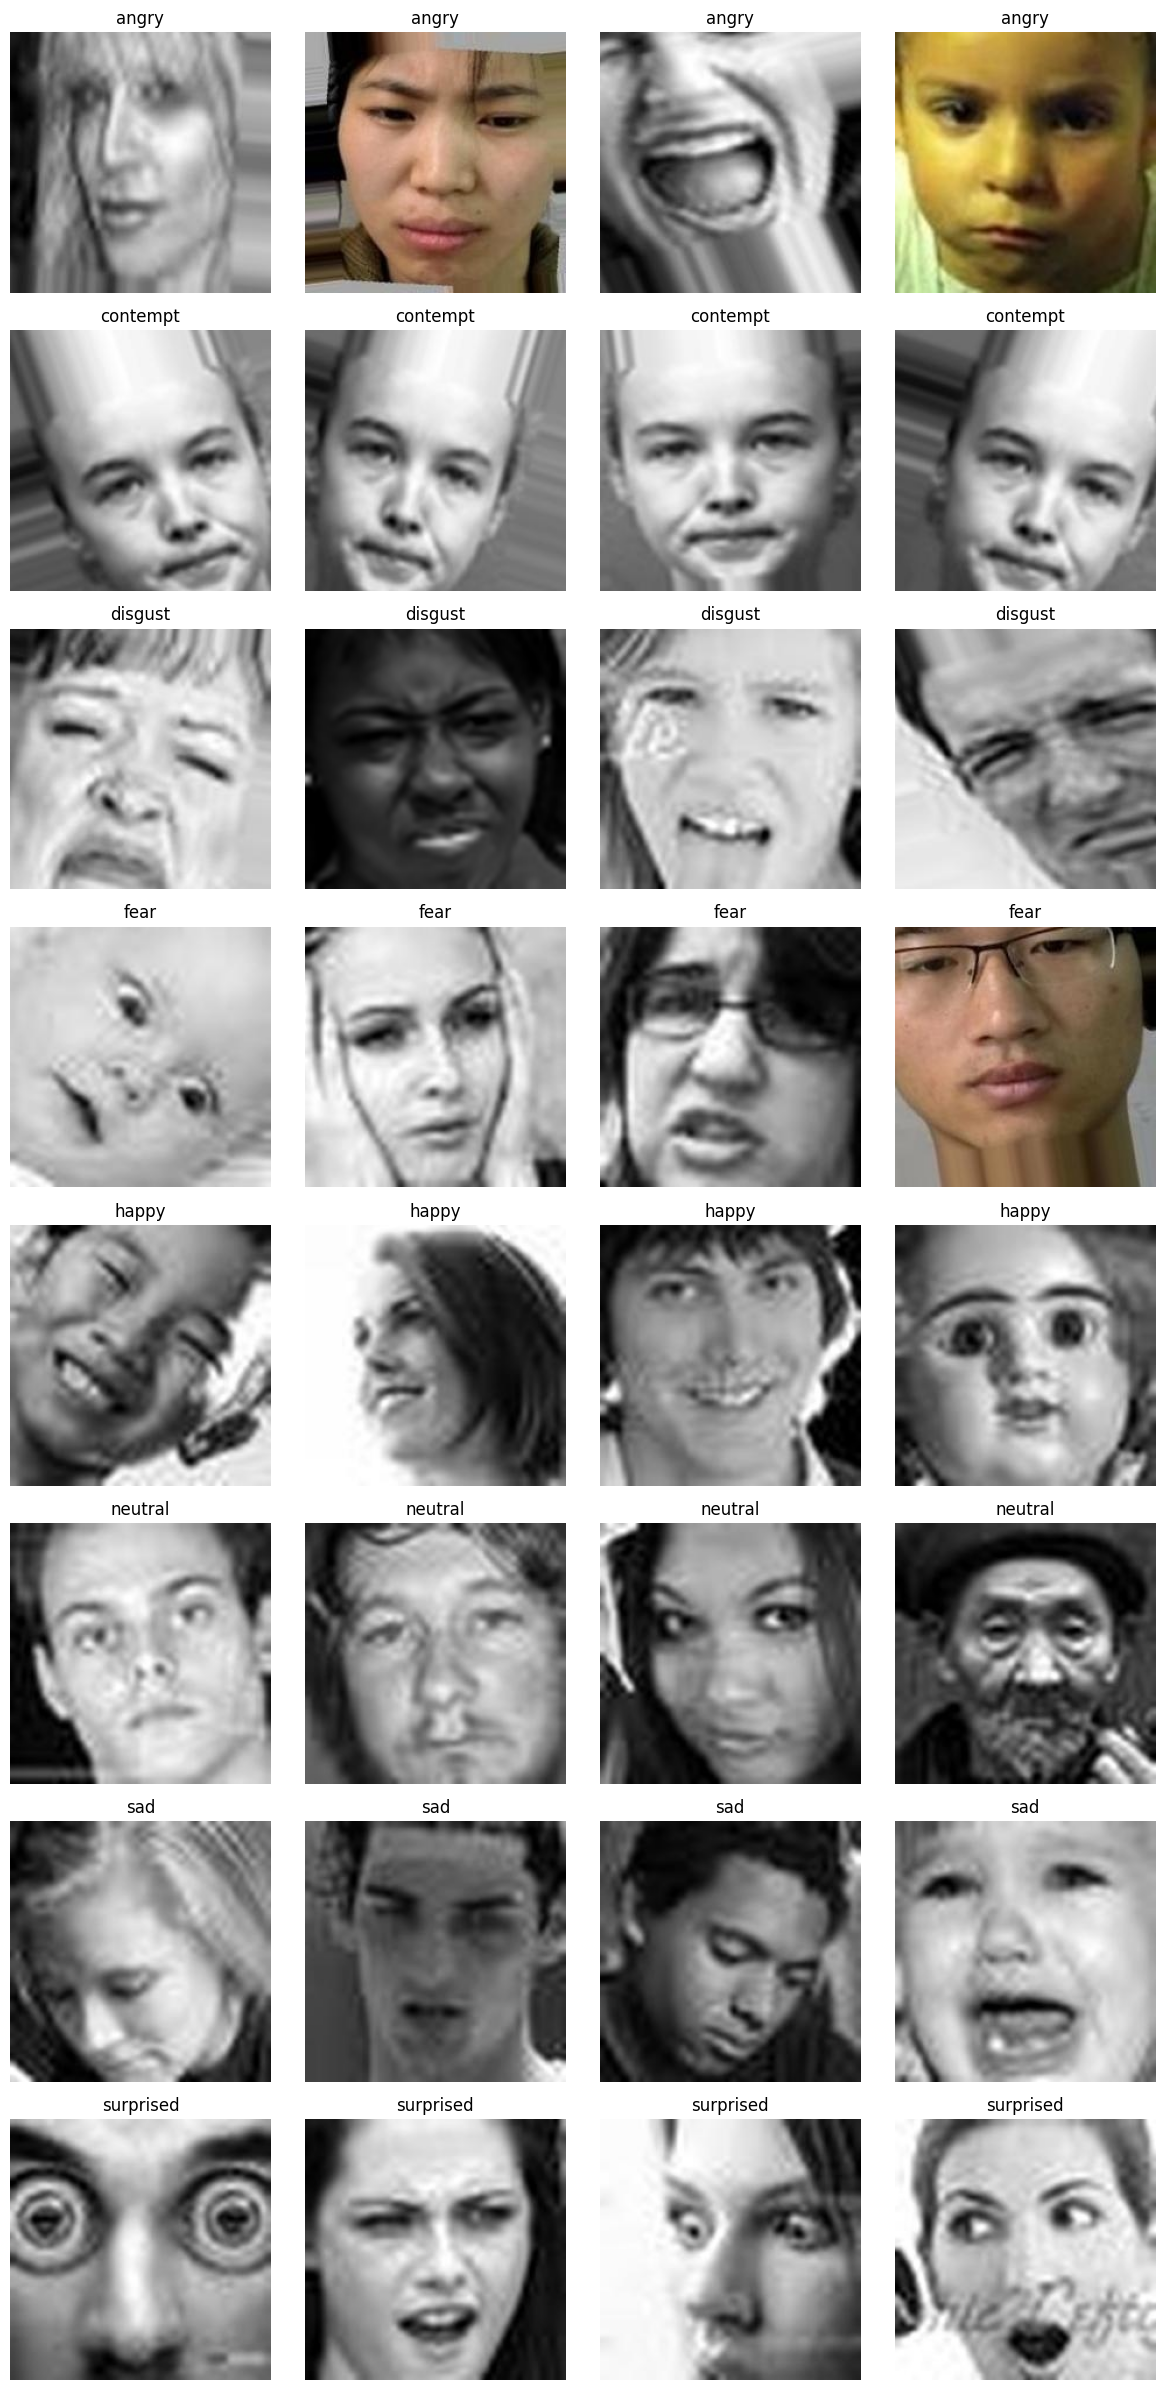

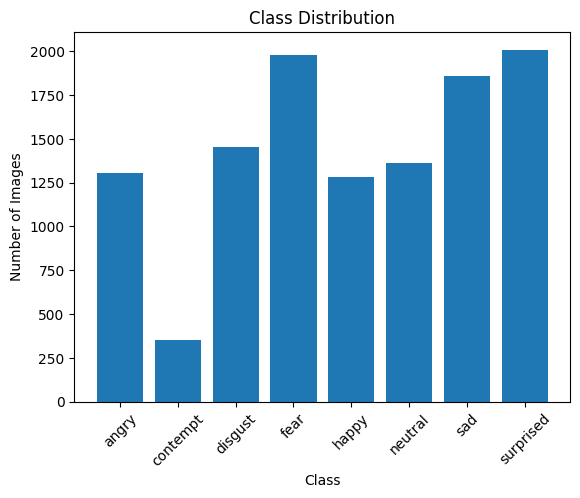

Image Size Statistics:
Mean Size: [224. 224.]
Median Size: [224. 224.]
Min Size: [224 224]
Max Size: [224 224]


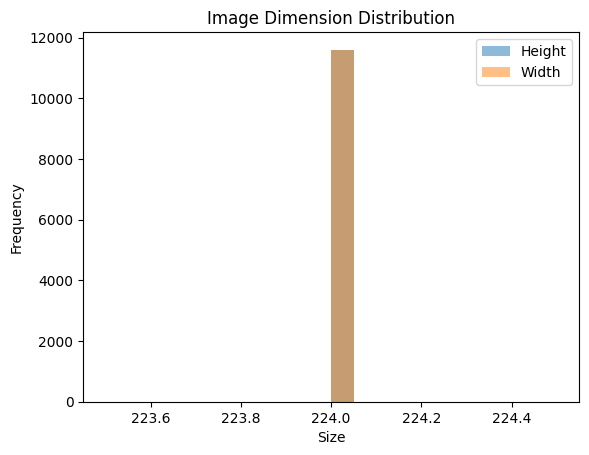

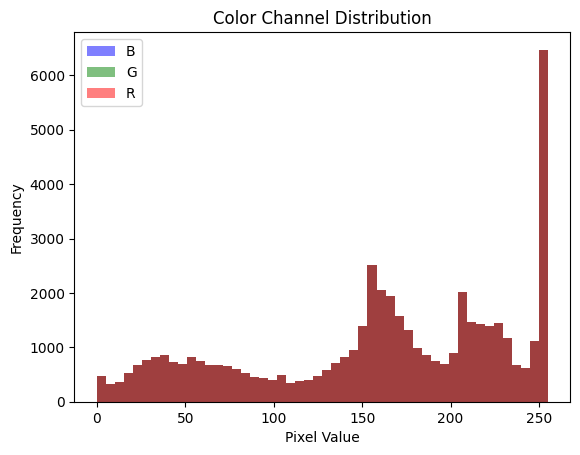

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Step 1: Dataset Overview
dataset_dir = "/content/drive/MyDrive/final dataset two"
class_names = sorted(os.listdir(dataset_dir))
num_classes = len(class_names)
print("Number of classes:", num_classes)

# Step 2: Load and Visualize Sample Images
fig, axes = plt.subplots(nrows=num_classes, ncols=4, figsize=(12, 3*num_classes))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(dataset_dir, class_name)
    image_files = os.listdir(class_dir)
    sample_images = np.random.choice(image_files, size=4, replace=False)
    for j, image_file in enumerate(sample_images):
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        axes[i, j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i, j].set_title(class_name)
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

# Step 3: Class Distribution
class_counts = [len(os.listdir(os.path.join(dataset_dir, class_name))) for class_name in class_names]
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

# Step 4: Image Statistics
image_sizes = []
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        image_sizes.append(image.shape[:2])
image_sizes = np.array(image_sizes)
print("Image Size Statistics:")
print("Mean Size:", np.mean(image_sizes, axis=0))
print("Median Size:", np.median(image_sizes, axis=0))
print("Min Size:", np.min(image_sizes, axis=0))
print("Max Size:", np.max(image_sizes, axis=0))

# Step 5: Dimensionality Analysis
plt.hist(image_sizes[:, 0], bins=20, alpha=0.5, label='Height')
plt.hist(image_sizes[:, 1], bins=20, alpha=0.5, label='Width')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Image Dimension Distribution')
plt.legend()
plt.show()

# Step 6: Color Analysis
color_channels = ('b', 'g', 'r')
for i, channel in enumerate(color_channels):
    channel_values = image[:, :, i].flatten()
    plt.hist(channel_values, bins=50, color=channel, alpha=0.5, label=channel.upper())
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Color Channel Distribution')
plt.legend()
plt.show()


MODELS

Model 1


VGG 16

In [ ]:
!pip install seaborn

Found 11599 files belonging to 8 classes.
Using 9280 files for training.
Found 11599 files belonging to 8 classes.
Using 2319 files for validation.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
290/290 [==============================] - 1760s 6s/step - loss: 4.3546 - accuracy: 0.3430 - val_loss: 1.6462 - val_accuracy: 0.3728
Epoch 2/20
290/290 [==============================] - 46s 157ms/step - loss: 1.4748 - accuracy: 0.4550 - val_loss: 1.5320 - val_accuracy: 0.4130
Epoch 3/20
290/290 [==============================] - 46s 156ms/step - loss: 1.2433 - accuracy: 0.5261 - val_loss: 1.4985 - val_accuracy: 0.4430
Epoch 4/20
290/290 [==============================] - 46s 155ms/step - loss: 1.0971 - accuracy: 0.5781 - val_loss: 1.5058 - val_accuracy: 0.4756
Epoch 5/20
290/290 [==============================] - 47s 157ms/step - loss: 0.9716 - accuracy: 0.6213 - val_loss: 1.5140 - val_accuracy: 0.4901
Epoch 6/20
290/290 [==============================] - 46s 155ms

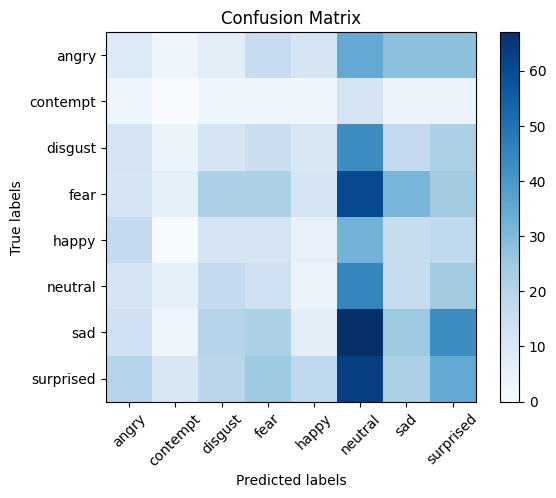

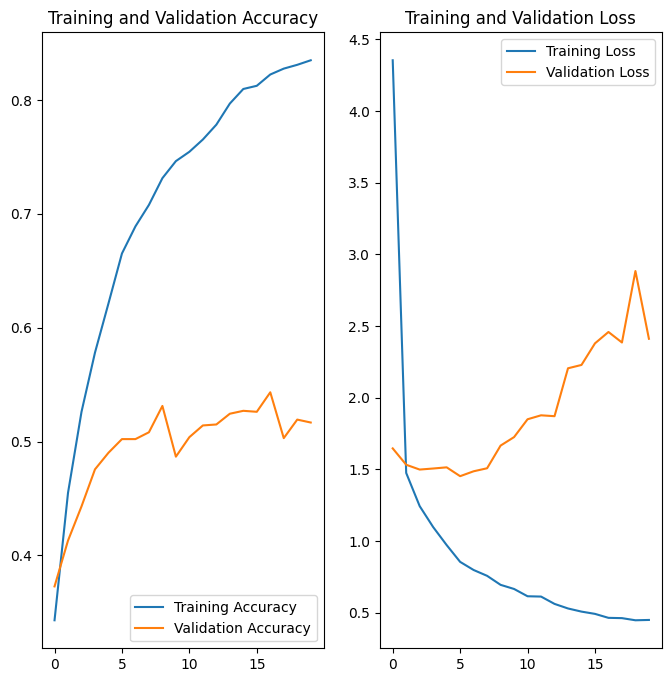

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os

# Define constants
DATASET_DIR = '/content/drive/MyDrive/final dataset two'
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 8
EPOCHS = 20

# Load dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

# Further split validation set to get a separate test set
test_dataset = validation_dataset.take(int(0.5 * len(validation_dataset)))
validation_dataset = validation_dataset.skip(int(0.5 * len(validation_dataset)))

# Preprocess dataset
class_names = train_dataset.class_names

# Load pre-trained VGG16 model
base_model = VGG16(input_shape=(224, 224, 3),
                   include_top=False,
                   weights='imagenet')

# Freeze base model layers
base_model.trainable = False

# Add classification head
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test Accuracy:', test_accuracy)

# Generate predictions
predictions = model.predict(test_dataset)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = np.argmax(predictions, axis=1)

# Visualize confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(range(NUM_CLASSES), class_names, rotation=45)
plt.yticks(range(NUM_CLASSES), class_names)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

# Visualize training and validation accuracies and losses
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Model 2

VGG 19

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os

# Define constants
DATASET_DIR = '/content/drive/MyDrive/final dataset two'
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 16
EPOCHS = 20

# Load dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

# Further split validation set to get a separate test set
test_dataset = validation_dataset.take(int(0.5 * len(validation_dataset)))
validation_dataset = validation_dataset.skip(int(0.5 * len(validation_dataset)))

# Preprocess dataset
class_names = train_dataset.class_names

# Load pre-trained VGG19 model
base_model = VGG19(input_shape=(224, 224, 3),
                   include_top=False,
                   weights='imagenet')

# Freeze base model layers
base_model.trainable = False

# Add classification head
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test Accuracy:', test_accuracy)

# Generate predictions
predictions = model.predict(test_dataset)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = np.argmax(predictions, axis=1)

# Visualize confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(range(NUM_CLASSES), class_names, rotation=45)
plt.yticks(range(NUM_CLASSES), class_names)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

# Visualize training and validation accuracies and losses
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Found 11599 files belonging to 8 classes.
Using 9280 files for training.
Found 11599 files belonging to 8 classes.
Using 2319 files for validation.
80134624/80134624 [==============================] - 0s 0us/step
Epoch 1/10
 27/290 [=>............................] - ETA: 21:43 - loss: 31.8072 - accuracy: 0.3113

Model 3

CNN CONVOLUTIONAL NEURAL NETWORKS

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


Epoch 1/20
232/232 [==============================] - 48s 180ms/step - loss: 1.9679 - accuracy: 0.1966 - val_loss: 1.9357 - val_accuracy: 0.2430
Epoch 2/20
232/232 [==============================] - 42s 182ms/step - loss: 1.9011 - accuracy: 0.2401 - val_loss: 1.8124 - val_accuracy: 0.2812
Epoch 3/20
232/232 [==============================] - 44s 189ms/step - loss: 1.8302 - accuracy: 0.2852 - val_loss: 1.7242 - val_accuracy: 0.3486
Epoch 4/20
232/232 [==============================] - 42s 179ms/step - loss: 1.7414 - accuracy: 0.3298 - val_loss: 1.6359 - val_accuracy: 0.3728
Epoch 5/20
232/232 [==============================] - 42s 179ms/step - loss: 1.6828 - accuracy: 0.3515 - val_loss: 1.6241 - val_accuracy: 0.4079
Epoch 6/20
232/232 [==============================] - 42s 181ms/step - loss: 1.6440 - accuracy: 0.3706 - val_loss: 1.5826 - val_accuracy: 0.4068
Epoch 7/20
232/232 [==============================] - 43s 186ms/step - loss: 1.6215 - accuracy: 0.3803 - val_loss: 1.5548 - val_ac

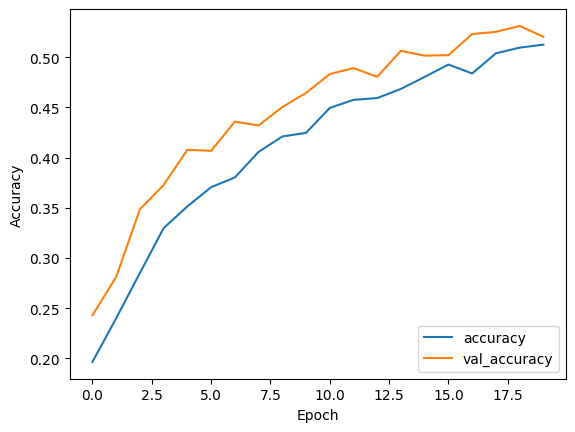

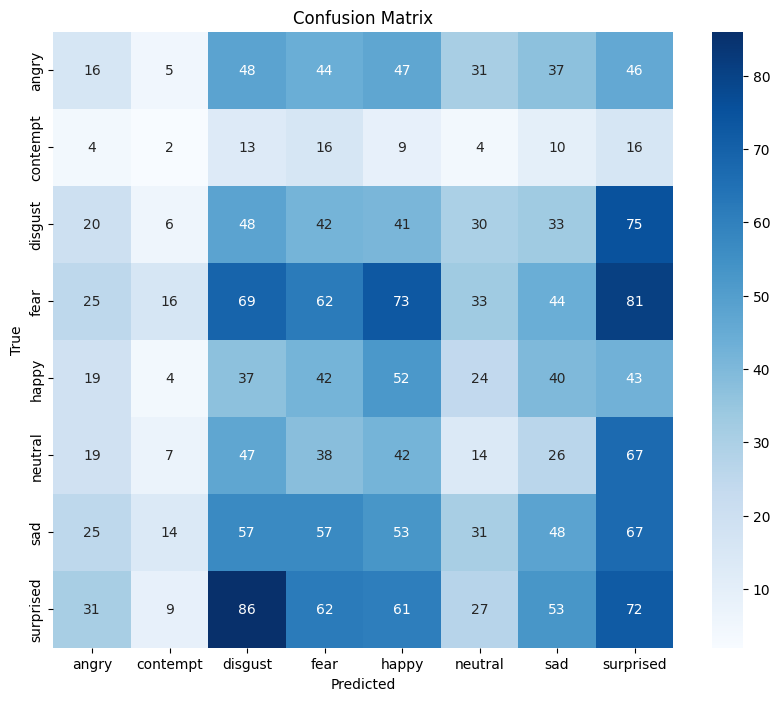

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load images from directory and convert to numpy arrays
def load_images_from_directory(directory, img_height, img_width):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
            img_array = keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(class_name)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Data directory
data_dir = "/content/drive/MyDrive/final dataset two"

# Load images and labels
img_height, img_width = 150, 150  # Image dimensions
images, labels = load_images_from_directory(data_dir, img_height, img_width)

# Convert class labels to one-hot encoding
label_to_index = {label: i for i, label in enumerate(np.unique(labels))}
labels = np.array([label_to_index[label] for label in labels])
num_classes = len(label_to_index)

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)

print("Test Accuracy:", test_acc)

# Make predictions
y_pred = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and accuracy
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test, y_pred_labels)

print("Precision:", precision)
print("Recall:", recall)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Model 4

VISION TRANSFORMERS  WITH SELF ATTENTION MECHANISM

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/10
232/232 [==============================] - 49s 181ms/step - loss: 2.0378 - accuracy: 0.1658 - val_loss: 2.0453 - val_accuracy: 0.1638
Epoch 2/10
232/232 [==============================] - 42s 179ms/step - loss: 2.0253 - accuracy: 0.1762 - val_loss: 1.9901 - val_accuracy: 0.1994
Epoch 3/10
232/232 [==============================] - 42s 182ms/step - loss: 2.0103 - accuracy: 0.1797 - val_loss: 2.0323 - val_accuracy: 0.1638
Epoch 4/10
232/232 [==============================] - 44s 188ms/step - loss: 2.0056 - accuracy: 0.1848 - val_loss: 1.9988 - val_accuracy: 0.1875
Epoch 5/10
232/232 [==============================] - 44s 188ms/step - loss: 2.0013 - accuracy: 0.1821 - val_loss: 1.9968 - val_accuracy: 0.1692
Epoch 6/10
232/232 [==============================] - 41s 177ms/step - loss: 1.9999 - accuracy: 0.1843 - val_loss: 1.9772 - val_accuracy: 0.1918
Epoch 7/10
232/232 [==============================] - 41s 177ms/step - loss: 1.9855 - accuracy: 0.1873 - val_loss: 1.9608 - val_ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


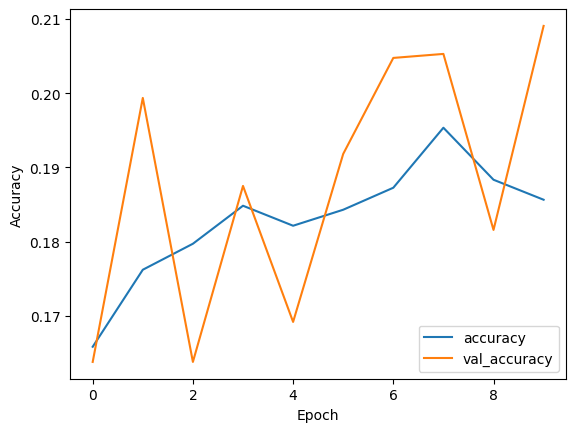

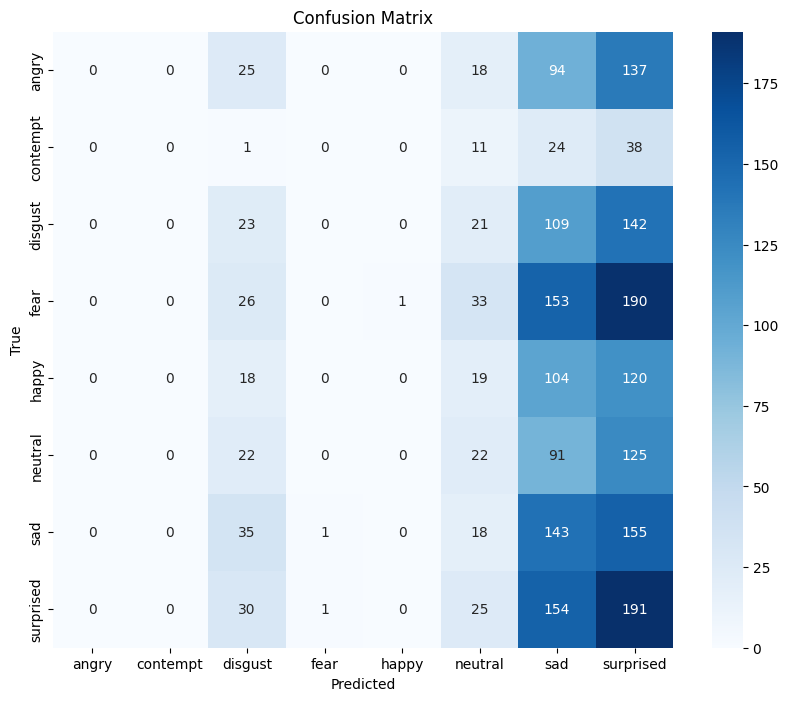

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_addons as tfa

# Function to load images from directory and convert to numpy arrays
def load_images_from_directory(directory, img_height, img_width):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            img = keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
            img_array = keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(class_name)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Data directory
data_dir = "/content/drive/MyDrive/final dataset two"

# Load images and labels
img_height, img_width = 150, 150  # Image dimensions
images, labels = load_images_from_directory(data_dir, img_height, img_width)

# Convert class labels to one-hot encoding
label_to_index = {label: i for i, label in enumerate(np.unique(labels))}
labels = np.array([label_to_index[label] for label in labels])
num_classes = len(label_to_index)

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

# Define Vision Transformer model
def create_vit_model(img_height, img_width, num_classes):
    inputs = layers.Input(shape=(img_height, img_width, 3))
    x = layers.Rescaling(scale=1.0 / 255)(inputs)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.Conv2D(64, 3, strides=2, padding="same")(x)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = keras.Model(inputs, outputs)
    return model

# Create ViT model
vit_model = create_vit_model(img_height, img_width, num_classes)

# Compile the model
vit_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history = vit_model.fit(train_generator, epochs=20, validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = vit_model.evaluate(test_generator)

print("Test Accuracy:", test_acc)

# Make predictions
y_pred = vit_model.predict(test_generator)
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and accuracy
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
accuracy = accuracy_score(y_test, y_pred_labels)

print("Precision:", precision)
print("Recall:", recall)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_to_index.keys(), yticklabels=label_to_index.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()